In [13]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
                            confusion_matrix, 
                            f1_score,
                            accuracy_score,
                            precision_score,
                            recall_score
                            )
warnings.filterwarnings('ignore')

In [14]:
seed = 42
np.random.seed(seed)

### Quick Overview of Logistic Regression 

Y_hat(Z) = 1 / (1 + exp(-Z))

P(Y = 1 | X) = Y_hat(Z)

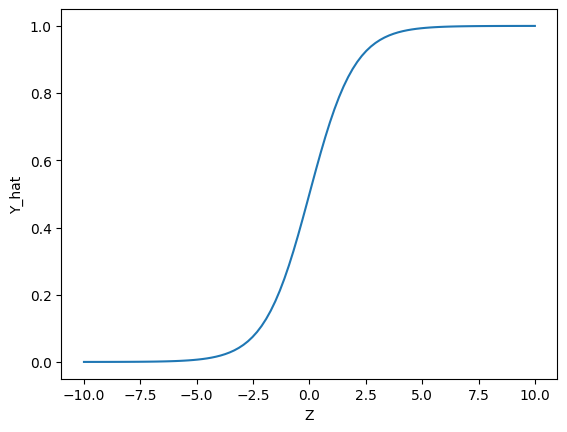

In [15]:
def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

X_linespace = np.linspace(-10, 10, 100)
Y_hat = sigmoid(X_linespace)

plt.plot(X_linespace, Y_hat)
plt.xlabel('Z')
plt.ylabel('Y_hat')
plt.show()

### Loading the Data 

In [16]:
X_train = np.load('artifacts/X_train.npz')['arr_0']
Y_train = np.load('artifacts/Y_train.npz')['arr_0']
X_test = np.load('artifacts/X_test.npz')['arr_0']
Y_test = np.load('artifacts/y_test.npz')['arr_0']

### Model Training 

In [17]:
model_lr = LogisticRegression(
                            random_state = 42,
                            max_iter = 1000      
                            )
model_lr.fit(X_train, Y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


### Inference

Y_hat = Y_hat_proba > 0.5

In [18]:
Y_proba_train = model_lr.predict_proba(X_train)
Y_proba_test = model_lr.predict_proba(X_test)

In [19]:
pd.Series(Y_test).value_counts()

0    1623
1     376
Name: count, dtype: int64

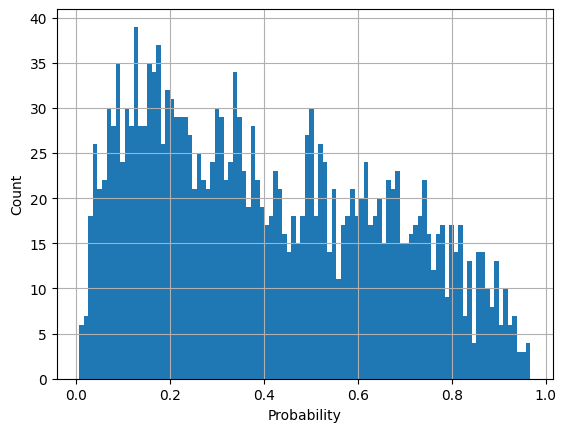

In [20]:
Y_lr_test =  Y_proba_test[:, 1]

plt.hist(Y_lr_test, bins=100)
plt.xlabel('Probability')
plt.ylabel('Count')
plt.grid(True)
plt.show()

### Evaluation

In [21]:
Y_hat_test = Y_lr_test > 0.65
Y_hat_test

array([False, False, False, ..., False, False,  True])

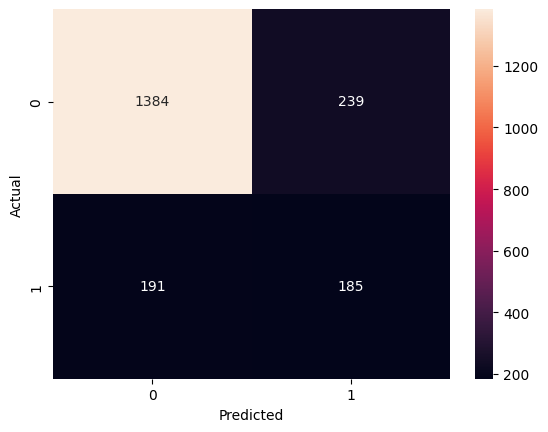

In [22]:
cm = confusion_matrix(Y_test, Y_hat_test)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()